# Упражнение с CNN 
Мы будем работать с набором данных <a href='https://www.kaggle.com/zalando-research/fashionmnist'> Fashion-MNIST </a>, который  доступен через <a href = 'https://pytorch.org/docs/stable/torchvision/index.html'> <tt> <STRONG> torchvision </STRONG> </tt> </a>. Как и MNIST, этот набор данных состоит из обучающего набора из 60000 изображений и тестового множества из 10000 примеров. Каждый пример представляет собой изображение в градациях серого цвета 28x28, с меткой одного из 10 классов:
0. T-shirt/top
1. Trouser
2. Pullover
3. Dress
4. Coat
5. Sandal
6. Shirt
7. Sneaker
8. Bag
9. Ankle boot



## Импорт, загрузка  Fashion-MNIST 
Запустите ячейку ниже, чтобы загрузить библиотеки, необходимые для этого упражнения, и набор данных Fashion-MNIST. <br>
PyTorch делает доступным набор данных Fashion-MNIST через <a href='https://pytorch.org/docs/stable/torchvision/datasets.html#fashion-mnist'> <tt> <strong> torchvision </strong> </tt> </a>. При первом вызове набор данных будет загружен на ваш компьютер по указанному пути. С этого момента torchvision всегда будет искать локальную копию перед тем как загрузить данные в следующий раз.

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid

import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

transform = transforms.ToTensor()

train_data = datasets.FashionMNIST(root='../Data', train=True, download=True, transform=transform)
test_data = datasets.FashionMNIST(root='../Data', train=False, download=True, transform=transform)

class_names = ['T-shirt','Trouser','Sweater','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Boot']

Extracting ../Data\FashionMNIST\raw\train-images-idx3-ubyte.gz to ../Data\FashionMNIST\raw


Extracting ../Data\FashionMNIST\raw\train-labels-idx1-ubyte.gz to ../Data\FashionMNIST\raw


Extracting ../Data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to ../Data\FashionMNIST\raw


Extracting ../Data\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to ../Data\FashionMNIST\raw
Processing...


..\torch\csrc\utils\tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.




Done!



## 1. Создать data loaders
Используйте DataLoader чтобы создать <tt>train_loader</tt> и <tt>test_loader</tt>. Размеры батчей установить в 10.

In [2]:
# ВАШ КОД
train_loader = DataLoader(train_data, batch_size=10, shuffle=True)
test_loader = DataLoader(test_data, batch_size=10, shuffle=False)



In [2]:
# DON'T WRITE HERE

## 2. Изучите батч изображений
Используйте DataLoader, <tt> make_grid </tt> и matplotlib для отображения первого батча из 10 изображений. <br>
ДОПОЛНИТЕЛЬНО: отобразите метки классов

tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])
['Ankle boot', 'Pullover', 'Trouser', 'Trouser', 'Shirt', 'Trouser', 'Coat', 'Shirt', 'Sandal', 'Sneaker']


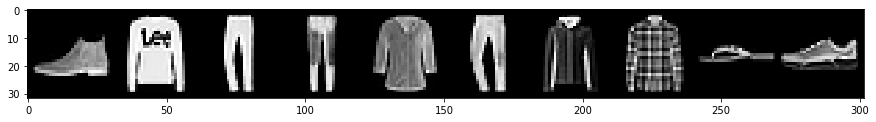

In [24]:
# ВАШ КОД
my_labels = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot"
}
for b, (X_train, y_train) in enumerate(test_loader):
    break

print(y_train)
batch_labels = []
for label in np.array(y_train):
    batch_labels.append(my_labels[label])
print(batch_labels)

grid = make_grid(X_train, nrow=10)
# print(grid.size())
plt.figure(figsize=(15, 20))
plt.imshow(np.transpose(grid, (1, 2, 0)))



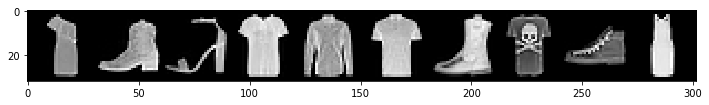

In [3]:
# DON'T WRITE HERE
# IMAGES ONLY

Label:  [9 2 5 9 4 2 1 2 7 3]
Class:  Boot Sweater Sandal Boot Coat Sweater Trouser Sweater Sneaker Dress


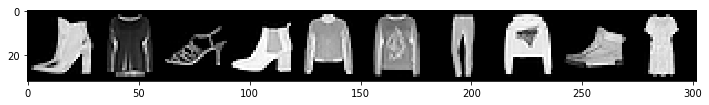

In [4]:
# DON'T WRITE HERE
# IMAGES AND LABELS

## Вопросы для самоконтроля
<H3> 3. Если изображение 28x28 пропускается через сверточный слой с использованием фильтра 5x5, с шагом 1 и без padding, каков будет размер матрицы (на выходе)? </H3>

<div style='border:1px black solid; padding:5px'>
<br>24x24<br>
</div>

In [25]:
######################################################
## ЗАПУСТИТЕ ЭТОТ КОД ТОЛЬКО ЧТОБЫ ПРОВЕРИТЬ ОТВЕТ! ##
######################################################


# Run the code below to check your answer:
conv = nn.Conv2d(1, 1, 5, 1)
for x,labels in train_loader:
    print('Orig size:',x.shape)
    break
x = conv(x)
print('Down size:',x.shape)

Orig size: torch.Size([10, 1, 28, 28])
Down size: torch.Size([10, 1, 24, 24])


### 4. Если пример из вопроса 3 затем пропускается через слой MaxPooling 2x2, каков будет размер результирующей матрицы?

<div style='border:1px black solid; padding:5px'>
<br>12x12<br>
</div>

In [26]:
######################################################
## ЗАПУСТИТЕ ЭТОТ КОД ТОЛЬКО ЧТОБЫ ПРОВЕРИТЬ ОТВЕТ! ##
######################################################

# Run the code below to check your answer:
x = F.max_pool2d(x, 2, 2)
print('Down size:',x.shape)

Down size: torch.Size([10, 1, 12, 12])


## Определяем CNN 
### 5. Определить сверточную нейронную сеть
Определите модель CNN, которую можно обучить в наборе данных Fashion-MNIST. Модель должна содержать два сверточных слоя, два пулинга и два полносвязанных слоя. Вы можете использовать любое количество нейронов на слой, если модель принимает изображение размером 28x28 и возвращает результат 10. 

In [28]:

class ConvolutionalNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 6, 3, 1)
        self.conv2 = nn.Conv2d(6, 16, 3, 1)
        self.fc1 = nn.Linear(5*5*16, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84,10)

    def forward(self, X):
        X = F.relu(self.conv1(X))
        X = F.max_pool2d(X, 2, 2)
        X = F.relu(self.conv2(X))
        X = F.max_pool2d(X, 2, 2)
        X = X.view(-1, 5*5*16)
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = self.fc3(X)
        return F.log_softmax(X, dim=1)
    
torch.manual_seed(101)
model = ConvolutionalNetwork()

## Обучаемые параметры

### 6. Каково общее количество обучаемых параметров в модели выше?
Ответ будут варьироваться в зависимости от того, как вы определили модель.

<div style='border:1px black solid; padding:5px'>
<br><br>
</div>

In [ ]:
# ВАШ КОД

### 7. Определить функцию потерь и оптимизатор
Определите функцию потерь под названием «criterion» и оптимизатор под названием «optimizer». <br>
Вы можете использовать любые функции, какие захотите, хотя мы использовали CrossEntropyLoss и Adam (с шагом lr= 0,001) соответственно.

In [29]:
# ВАШ КОД
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


In [6]:
# DON'T WRITE HERE

### 8. Тренируем модель
Обучайте модель 5 эпох. <br>
ДОПОЛНИТЕЛЬНО: Сделайте вывод после каждой эпохи, чтобы показать прогресс в обучении. Измерьте время обучения на одну эпоху.

In [30]:
# ВАШ КОД
epochs = 5

for i in range(epochs):
    trn_corr = 0
    
    for b, (X_train, y_train) in enumerate(train_loader):
        b += 1
        y_pred = model(X_train)
        loss = criterion(y_pred, y_train)
        
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        trn_corr += batch_corr
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    print('{} of {} epochs completed'.format(i+1, epochs))



0 of 5 epochs completed
1 of 5 epochs completed
2 of 5 epochs completed
3 of 5 epochs completed
4 of 5 epochs completed


1 of 5 epochs completed
2 of 5 epochs completed
3 of 5 epochs completed
4 of 5 epochs completed
5 of 5 epochs completed


### 9. Оцените модель
Вызовите <tt> model.eval () </tt> и определите процент правильных значений из 10000 тестовых изображений.

In [31]:
# ВАШ КОД
model.eval()

correct = 0
for X_test, y_test in test_loader:
    y_val = model(X_test)  
    predicted = torch.max(y_val,1)[1]
    correct += (predicted == y_test).sum()
print(f'Test accuracy: {correct.item()}/{len(test_data)} = {correct.item()*100/(len(test_data)):7.3f}%')





Test accuracy: 8824/10000 =  88.240%


Test accuracy: 8733/10000 =  87.330%
